## Coding Convolution

In this notebook, I will create some custom filters and create functions to do convolution and pooling. This will be similar to taking a look at a cross section of the convolutional layers and the pooling layers of a Convolutional Neural Network. You can see that I first display different filters and then use them for the convolution operation. Make sure to check out what features each filter amplifies and detects. In an actual convolutional neural network we would have similar filters (and many others) and in the end we would be able to detect visual features and their different combinations to detect more complicated shapes. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, correlate2d
%matplotlib inline

In [2]:
#defining functions to plot images
def plot_1_4(images):
    num_row = 1
    num_col = 4
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(6, 25))
    for i in range(4):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
    plt.tight_layout()
    plt.show()


In [3]:
def plot_4_4(images):
    num_row = 4
    num_col = 4
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(4):
        for j in range(4):
          ax = axes[j, i]
          ax.imshow(images[j][i], cmap='gray')
    plt.tight_layout()
    plt.show()

In [4]:
#loading the data
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
#normalizing the data
x_train = x_train/255

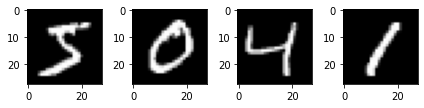

In [6]:
#getting 4 digits
digits = x_train[:4]

plot_1_4(digits)


In [7]:
#defining filters
F1 = np.array([[-1, 0, -1], [0, 4, 0], [-1, 0, -1]])
F2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
F3 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
F4 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
filters = [F1, F2, F3, F4]

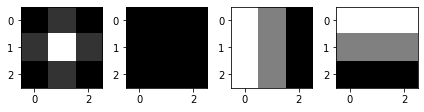

In [8]:
#taking at a look at how the filters look like
plot_1_4(filters)

In [9]:
#Defining the function to do convolution
#Takes a 2D numpy array and a list of filters as inputs
#Outputs the results of convulutions. Output size (number of filters, (input dimensions))
def convolution(input, filter_list):
  first_output = []
  #Create an empty list
  for filter in filter_list:
      #for each filter perform convolution. 
      #For this I use the numpy cross correlation function. As the convolution in the machine learning context is actually cross correlation
      #Here you can do zero padding based on the argument. I use 'same'
      first_output.append(correlate2d(input, filter, 'same'))
  return first_output

In [10]:
#For all 4 digits chosen at the begining perform convolution

out_0 = convolution(digits[0], filters)
out_1 = convolution(digits[1], filters)
out_2 = convolution(digits[2], filters)
out_3 = convolution(digits[3], filters)

convolution_outs = [out_0, out_1, out_2, out_3]

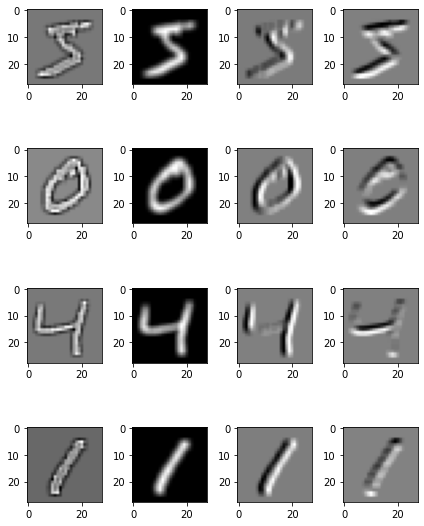

In [11]:
#Plot the results of the convolution
plot_4_4(convolution_outs)

In [12]:
#Defining the function to do pooling
#Takes an input array, stride and pool size as inputs
#Outputs the pooled array

def max_pooling(input, stride, size):
    #Creating the output array. It's dimensions are calculated
    output = np.zeros((len(input)//size, len(input)//size))
    
    #looping in both axes
    for i in range(0, output.shape[0]):
        for j in range(0, output.shape[1]):
            #For each (size, size) location get the maximum value
            output[j, i] = np.max(input[stride*j:stride*j+size, stride*i:stride*i+size].flatten())

    return output


In [13]:
#For each convoluted digit, we perform pooling with stride and size = 2
pooled_images = [[], [], [], []]

for i in range(len(convolution_outs)):
    for j in range(len(convolution_outs[i])):
        pooled_image = max_pooling(convolution_outs[i][j], 2, 2)
        pooled_images[i].append(pooled_image)



In [14]:
#Checking if the sizes are correct
pooled_images[0][0].shape

(14, 14)

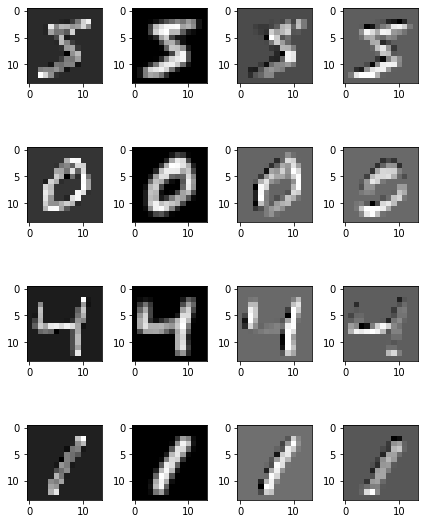

In [15]:
#plot and check how your pooled images look like
plot_4_4(pooled_images)

Normally, you wouldn't use the same 4 filters in an actual CNN for each step of the convolution. Some layers can 32 or 64 filters. And the filters at each step could be specialized to identify different features. But for the purposes of this activity let's keep on using the same filters and do another round of convolution to observe how will our data change. Run the cells below and observe the outputs. You can also inspect how the size of the data changes at each level. You don't need to code anything to run the cells after this.

In [16]:
#We'll do it with only one of the outputs. But technically we would've had 16 convolutions after this step if we used all of the outputs.
second_out_0 = convolution(pooled_images[0][0], filters)
second_out_1 = convolution(pooled_images[1][0], filters)
second_out_2 = convolution(pooled_images[2][0], filters)
second_out_3 = convolution(pooled_images[3][0], filters)

second_convolution_outs = [second_out_0, second_out_1, second_out_2, second_out_3]

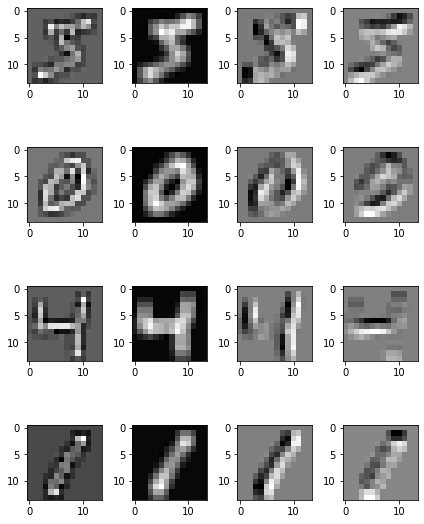

In [17]:
plot_4_4(second_convolution_outs)

In [18]:
second_pooled_images = [[], [], [], []]

for i in range(len(second_convolution_outs)):
    for j in range(len(second_convolution_outs[i])):
        pooled_image = max_pooling(second_convolution_outs[i][j], 2, 2)
        second_pooled_images[i].append(pooled_image)

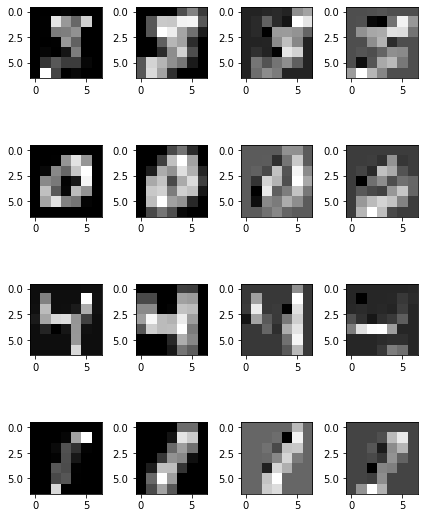

In [19]:
plot_4_4(second_pooled_images)